In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Catherine Devlin

# RDBMS were so last year...

# last year

# SQLAlchemy

# ~~object-relational mapper~~

# RDBMS toolbox

# ddlgenerator

## Import data *and* define tables

In [2]:
!head data/provinces.yaml

- bird: Common Loon
  cities:
  - {name: Toronto (Mississauga), population: 5583064}
  - {name: Hamilton (Burlington), population: 721053}
  - {name: Kitchener - Cambridge - Waterloo, population: 477160}
  - {name: London, population: 474786}
  - {name: 'St. Catharines - Niagara (Niagara Falls, Welland)', population: 392184}
  - {name: 'Oshawa (Whitby, Clarington)', population: 356177}
  - {name: Windsor (Lakeshore), population: 319246}
  - {name: Barrie (Innisfil), population: 187013}


In [4]:
!ddlgenerator -i -t postgresql data/provinces.yaml | head -20
# !ddlgenerator -i -t postgresql http://github.com/catherinedevlin/pycon2015_sqla_lightning/data/provinces.yaml

CREATE TABLE provinces (
	bird TEXT NOT NULL, 
	name TEXT NOT NULL, 
	provinces_id SERIAL NOT NULL, 
	PRIMARY KEY (provinces_id)
);


CREATE TABLE cities (
	name TEXT NOT NULL, 
	population INTEGER NOT NULL, 
	provinces_id INTEGER NOT NULL, 
	FOREIGN KEY(provinces_id) REFERENCES provinces (provinces_id)
);

INSERT INTO provinces (bird, name, provinces_id) VALUES ('Common Loon', 'Ontario', 1);
INSERT INTO provinces (bird, name, provinces_id) VALUES ('Cheeky Warbler', 'New Brunswick', 2);
INSERT INTO provinces (bird, name, provinces_id) VALUES ('Brawny Sparrow', 'Alberta', 3);
INSERT INTO provinces (bird, name, provinces_id) VALUES ('Self-Conscious Heron', 'Nova Scotia', 4);
INSERT INTO provinces (bird, name, provinces_id) VALUES ('Boreal Ostrich', 'Quebec', 5);
Exception ignored in: <_io.TextIOWrapper name='<stdout>' mode='w' encoding='UTF-8'>
BrokenPipeError: [Errno 32] Broken pipe


In [5]:
!dropdb pycon
!createdb pycon
!ddlgenerator -i postgresql data/provinces.yaml | psql pycon | head -20

CREATE TABLE
CREATE TABLE
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1


# ipython_sql

## Access the data

In [6]:
%load_ext sql

In [8]:
%sql postgresql://:@/pycon

'Connected: @pycon'

In [9]:
%sql SELECT name, bird FROM provinces ORDER BY name

12 rows affected.


name,bird
Alberta,Brawny Sparrow
British Columbia,Blue-throated Hipster
Manitoba,Hesitant Grebe
New Brunswick,Cheeky Warbler
Northwest Territories,Careless Lark
Nova Scotia,Self-Conscious Heron
Ontario,Common Loon
Ontario/Quebec,Evasive Stork
Prince Edward Island,Great Mallard
Quebec,Boreal Ostrich


In [10]:
%%sql 
SELECT c.name || ', ' || p.name AS name,    
       c.population                         
FROM   cities c                             
JOIN   provinces p                          
ON    (c.provinces_id = p.provinces_id)     
ORDER BY c.population DESC                  
LIMIT 10

10 rows affected.


name,population
"Toronto (Mississauga), Ontario",5583064
"Montreal (Laval), Quebec",3824221
"Vancouver (Surrey), British Columbia",2313328
"Ottawa - Gatineau, Ontario/Quebec",1236324
"Calgary, Alberta",1214839
"Edmonton, Alberta",1159869
"Quebec (Lévis), Quebec",765706
"Winnipeg, Manitoba",730018
"Hamilton (Burlington), Ontario",721053
"Kitchener - Cambridge - Waterloo, Ontario",477160


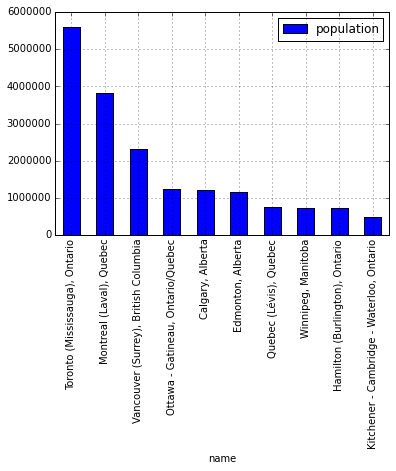

In [11]:
cities = _
cities.DataFrame().plot(kind='bar', x='name')

# rdbms-subsetter

## Get a consistent test database.

In [12]:
!dropdb pycon_test
!createdb pycon_test
!pg_dump --schema-only pycon | psql pycon_test

SET
SET
SET
SET
SET
SET
CREATE EXTENSION
COMMENT
SET
SET
SET
CREATE TABLE
ALTER TABLE
CREATE TABLE
ALTER TABLE
CREATE SEQUENCE
ALTER TABLE
ALTER SEQUENCE
ALTER TABLE
ALTER TABLE
ALTER TABLE
REVOKE
REVOKE
GRANT
GRANT


In [13]:
!rdbms-subsetter -y postgresql://:@/pycon postgresql://:@/pycon_test 0.1

Create 1 rows from 12 in .provinces
Create 14 rows from 142 in .cities
INFO:root:lowest completeness score (in provinces) at 0.000000
INFO:root:lowest completeness score (in cities) at -3.000000
INFO:root:lowest completeness score (in cities) at -1.581421
INFO:root:lowest completeness score (in cities) at 0.026160
INFO:root:lowest completeness score (in cities) at 0.601489
INFO:root:lowest completeness score (in cities) at -0.088610
INFO:root:lowest completeness score (in cities) at 0.311931
INFO:root:lowest completeness score (in cities) at 0.589413
INFO:root:lowest completeness score (in cities) at 0.795536
INFO:root:lowest completeness score (in cities) at 0.831376
INFO:root:lowest completeness score (in cities) at 0.864326
INFO:root:lowest completeness score (in cities) at 0.864326
INFO:root:lowest completeness score (in cities) at 0.894907
INFO:root:lowest completeness score (in cities) at 0.923501
INFO:root:lowest completeness score (in cities) at 0.700402
INFO:root:lowest comple

In [15]:
%%sql postgresql://:@/pycon_test
SELECT c.name || ', ' || p.name AS name,    
       c.population                         
FROM   cities c                             
JOIN   provinces p                          
ON    (c.provinces_id = p.provinces_id)     
ORDER BY c.population DESC   

15 rows affected.


name,population
"Toronto (Mississauga), Ontario",5583064
"Calgary, Alberta",1214839
"Edmonton, Alberta",1159869
"Hamilton (Burlington), Ontario",721053
"Kitchener - Cambridge - Waterloo, Ontario",477160
"Moncton (Dieppe, Riverview), New Brunswick",138644
"Saint John (Quispamsis), New Brunswick",127761
"Lethbridge, Alberta",105999
"Fredericton, New Brunswick",94268
"Belleville (Quinte West), Ontario",92540


# Still needed

* normalization/denormalization toolkit
* Jupyter Notebooks for tuning & monitoring
* inter-RDBMS translator

Catherine Devlin

http://tinyurl.com/pycon2015-sqla-tools